<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configurando-cores" data-toc-modified-id="Configurando-cores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configurando cores</a></span></li><li><span><a href="#Quantização-aleatória" data-toc-modified-id="Quantização-aleatória-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quantização aleatória</a></span></li><li><span><a href="#Quantização-por-frequência" data-toc-modified-id="Quantização-por-frequência-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quantização por frequência</a></span></li></ul></div>

# Exemplo de Quantização para visualização

## Configurando cores

In [1]:
pixels = ["#77C3F2", "#A3D8FA", "#92CFFB", "#77C3F2", "#C6D8E7", "#D8E6E7", "#A8CBE6", "#C6D8E7", "#E8DFE0", "#E6D6BF", "#FBD73A", "#D1B16A", "#BCA647", "#D49935", "#FBD73A", "#996E26"]

In [3]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

pixels_rgb = [hex_to_rgb(i) for i in pixels]
pixels_rgb

[(119, 195, 242),
 (163, 216, 250),
 (146, 207, 251),
 (119, 195, 242),
 (198, 216, 231),
 (216, 230, 231),
 (168, 203, 230),
 (198, 216, 231),
 (232, 223, 224),
 (230, 214, 191),
 (251, 215, 58),
 (209, 177, 106),
 (188, 166, 71),
 (212, 153, 53),
 (251, 215, 58),
 (153, 110, 38)]

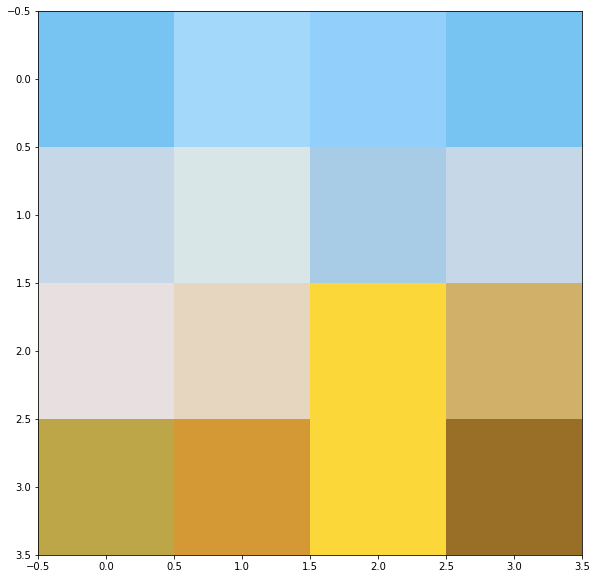

In [6]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

fig_rgb = np.asarray(pixels_rgb).reshape(4,4,3)

plt.figure(figsize=(10,10))
imgplot = plt.imshow(fig_rgb)
plt.show()

## Quantização aleatória

In [7]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

def quantize_shuffle(img, n_colors, metric='euclidean'):
    
    width, height, depth = img.shape
    
    # Redimensionando o suporte da imagem de R^2 para R
    flatten_img = np.reshape(img, (width * height, depth))

    # Selecionando um a paleta aleatória
    palette = shuffle(flatten_img, random_state=0)[:n_colors]
    
    # Busca pela cor mais próxima na paleta
    labels = pairwise_distances_argmin(flatten_img, palette, metric=metric)

    # Redistribui as cores no suporte
    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

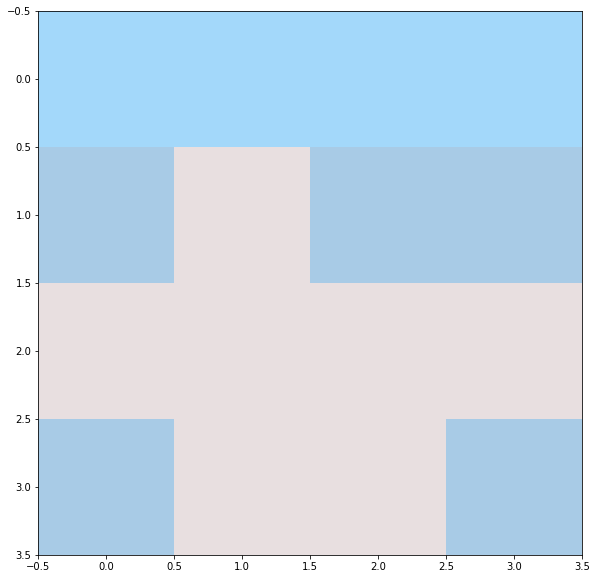

In [8]:
img_sh = quantize_shuffle(fig_rgb, 3)

plt.figure(figsize=(10,10))
imgplot = plt.imshow(img_sh)
plt.show()

In [9]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

pixels_sh = img_sh.reshape(16,3).tolist()
pixels_sh = [rgb_to_hex(tuple(i)) for i in pixels_sh]

pixels_sh

['#a3d8fa',
 '#a3d8fa',
 '#a3d8fa',
 '#a3d8fa',
 '#a8cbe6',
 '#e8dfe0',
 '#a8cbe6',
 '#a8cbe6',
 '#e8dfe0',
 '#e8dfe0',
 '#e8dfe0',
 '#e8dfe0',
 '#a8cbe6',
 '#e8dfe0',
 '#e8dfe0',
 '#a8cbe6']

## Quantização por frequência

In [14]:
from collections import Counter

def quantize_freq(img, n_colors, metric='euclidean'):
    
    width, height, depth = img.shape
    
    # Redimensionando o suporte da imagem de R^2 para R
    flatten_img = np.reshape(img, (width * height, depth))

    # Selecionando uma paleta com as n cores mais frequentes
    count_freq = Counter([tuple(i) for i in reshaped_raster])
    palette = np.array([i[0] for i in count_freq.most_common(n_colors)])
    
    # Busca pela cor mais próxima na paleta
    labels = pairwise_distances_argmin(reshaped_raster, palette, metric)

    # Redistribui as cores no suporte
    quantized_raster = np.reshape(palette[labels], (width, height, len(palette[0])))

    return quantized_raster

In [15]:
width, height, depth = fig_rgb.shape
reshaped_raster = np.reshape(fig_rgb, (width * height, depth))

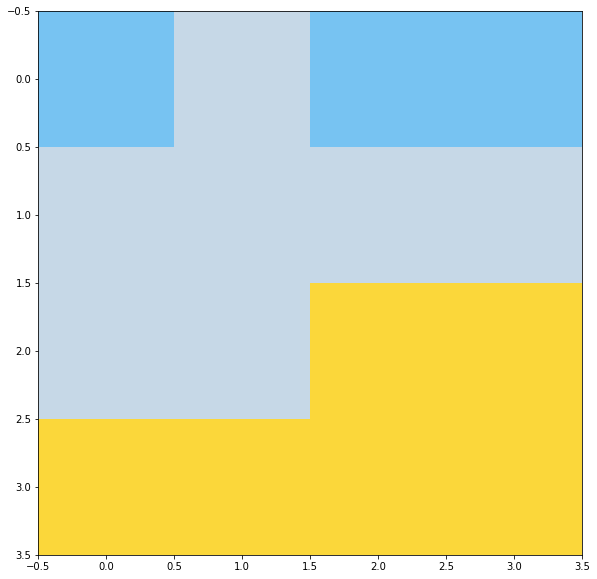

In [16]:
img_sh = quantize_freq(fig_rgb, 3)

plt.figure(figsize=(10,10))
imgplot = plt.imshow(img_sh)
plt.show()

In [17]:
pixels_sh = img_sh.reshape(16,3).tolist()
pixels_sh = [rgb_to_hex(tuple(i)) for i in pixels_sh]

pixels_sh

['#77c3f2',
 '#c6d8e7',
 '#77c3f2',
 '#77c3f2',
 '#c6d8e7',
 '#c6d8e7',
 '#c6d8e7',
 '#c6d8e7',
 '#c6d8e7',
 '#c6d8e7',
 '#fbd73a',
 '#fbd73a',
 '#fbd73a',
 '#fbd73a',
 '#fbd73a',
 '#fbd73a']

In [18]:
from sklearn import cluster

def quantize_kmeans(img, n_colors):
    
    width, height, depth = img.shape
    
    # Redimensionando o suporte da imagem de R^2 para R
    flatten_img = np.reshape(img, (width * height, depth))

    # Busca pelas cores para formar a paleta (cria os grupos)
    model = cluster.KMeans(n_clusters=n_colors)
    
    # Seleciona os grupos de cada ponto
    labels = model.fit_predict(flatten_img)
    
    # Seleciona as cores dos centróides de ccada grupo
    palette = model.cluster_centers_
    
    # Redistribui as cores no suporte de acordo com seu grupo
    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

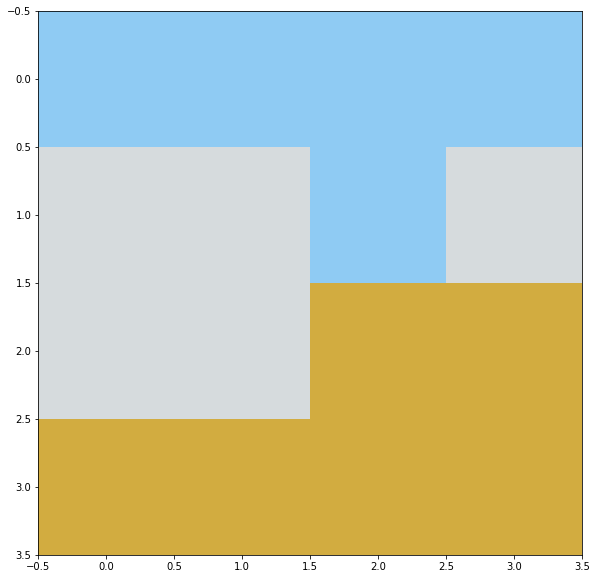

In [19]:
img_sh = quantize_kmeans(fig_rgb, 3)

plt.figure(figsize=(10,10))
imgplot = plt.imshow(img_sh.astype(int))
plt.show()

In [20]:
pixels_sh = img_sh.astype(int).reshape(16,3).tolist()
pixels_sh = [rgb_to_hex(tuple(i)) for i in pixels_sh]

pixels_sh

['#8fcbf3',
 '#8fcbf3',
 '#8fcbf3',
 '#8fcbf3',
 '#d6dbdd',
 '#d6dbdd',
 '#8fcbf3',
 '#d6dbdd',
 '#d6dbdd',
 '#d6dbdd',
 '#d2ac40',
 '#d2ac40',
 '#d2ac40',
 '#d2ac40',
 '#d2ac40',
 '#d2ac40']